# **An Introduction to Logistic Regression**
In this module, we will introduce mathematical and intuition based explanation for concepts like Sigmoidal Functions, Decision Boundaries, Supervised Learning, Train/Test/Validation Splits and Scoring Metrics (F1, Precision, and Recall)

Over the course of the next modules, you will explore machine learning applications in physics, from astronomy to biophysics to high energy physics.

Here, we begin with a classification problem of whether or not an object will move.





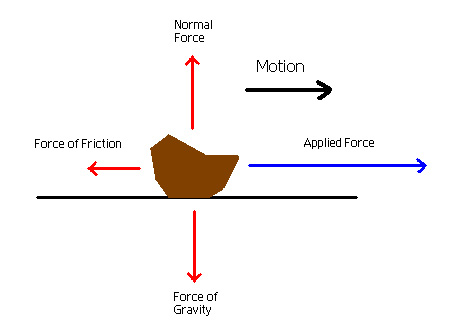

I know I know you, you guys have already know how to solve this analytically.


This is just a very easy introduction to classification problems in machine learning. We will introduce more complex physics problems that need machine learning as we get a better grasp on machine learning. But for now here is the Physics Review



## **Physics Review: Classical Mechanics**



The governing equation here is $$N = mg$$ $$f = μN$$ $$f \leq F$$

where N is normal force, m is mass, g is gravitational constant, $μ$ is frictional coefficient and F is horizontal applied force.

We know that if applied force is greater than frictional force, than the object will move. I will simulate this data below

### Learning Objectives

1. Decision Boundary
2. Sigmoid Function
3. SkLearn Built-In Models
4. Implement Gradient Descent and Cost Functions

## **ML**

### Preparing Dependancies

In [ ]:
%pip install -q gdown numpy pandas scikit-learn scipy matplotlib

In [ ]:
import numpy as np
import gdown
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, ConfusionMatrixDisplay


### Importing Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1Uozz9Nr-Ajg1Nv9LVueKUZaXhy5S2Ijb

Downloading...
From: https://drive.google.com/uc?id=1Uozz9Nr-Ajg1Nv9LVueKUZaXhy5S2Ijb
To: /content/statics.csv
100% 45.6k/45.6k [00:00<00:00, 66.1MB/s]


### Explore Dataset

In [ ]:
df = pd.read_csv('/content/statics.csv')
df.head()

,Unnamed: 0,labels,force applied,frictional coefficient
0,0,0.0,2.728552,0.778298
1,1,0.0,3.824200,0.892255
2,2,0.0,1.298377,0.245112
3,3,0.0,2.104434,0.207469
4,4,0.0,1.360571,0.094685


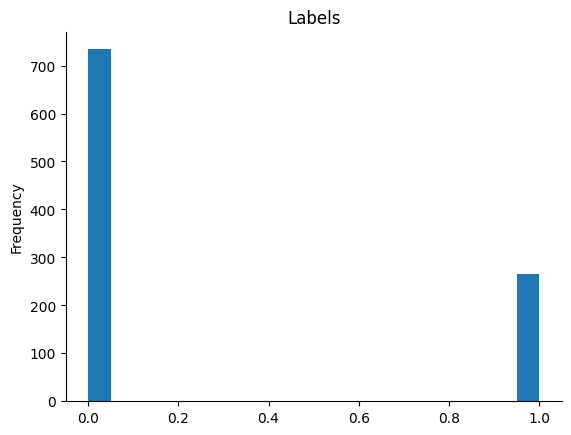

In [ ]:
# @title Labels
from matplotlib import pyplot as plt
df['labels'].plot(kind='hist', bins=20, title='Labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Extract labels, forces, and friction_coefficient from pandas dataframe
#Convert those dataframes to Numpy Arrays. (use to_numpy())

labels = df['labels'].to_numpy()
forces = df['force applied'].to_numpy()
friction_coeffs = df['frictional coefficient'].to_numpy()

In [ ]:
#Since our x_data will be both forces, and friction coefficients,
#reshape your labels so that its (1000,1)
labels = labels.reshape((1000))

#Create a features variable with shape (1000,2) and the first column is force
#second column is friction_coefffs. (reshape() and hstack() might be helpful function here)
forces = forces.reshape((1000,1))
friction_coeffs = friction_coeffs.reshape((1000,1))
features = np.hstack((forces, friction_coeffs))


### Your Goal:

We are using a simulated dataset of frictional coefficient values and force applied values, with a mystery mass. ooooooo.

I then labeled whether or not the object will move based on the the governing equations above.

Your goal if you choose to accept it is to determine what the mystery mass is.

### Decision Boundary

 We will first look at the math behind how logistic regression occurs. Then we will use built-in functions to determine the decision boundary and the mass of the object.

<div>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*aE8XLyApqvaQA9B7MWjjlA.png" width="500"/>
</div>



A decision boundary is a line that seperates different classes in a classification problem. It shows what the model has learned for deciding which side of the straight line the given input belongs to.

Seeing these decision boundaries help us see how a model makes decisions and determine whether is has correctly captured dataset traits.

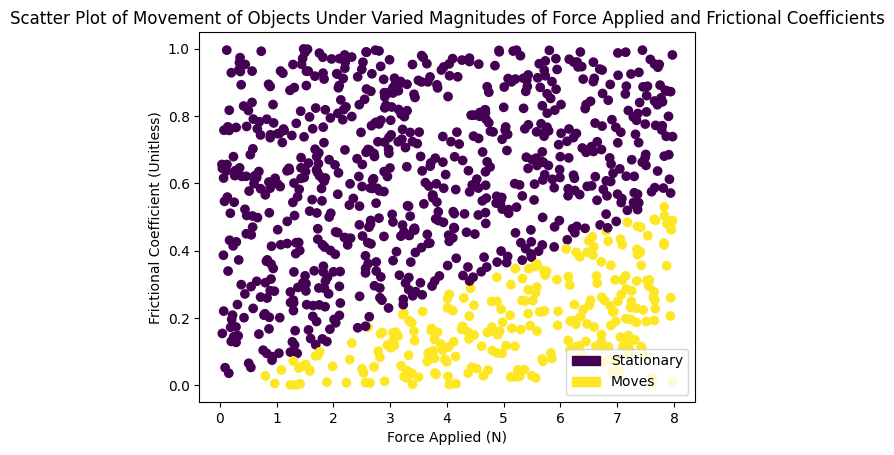

In [ ]:
plt.scatter(forces, friction_coeffs, c = labels)
plt.xlabel("Force Applied (N)")
plt.ylabel("Frictional Coefficient (Unitless)")
plt.title("Scatter Plot of Movement of Objects Under Varied Magnitudes of Force Applied and Frictional Coefficients")
move_patch = mpatches.Patch(color=plt.cm.viridis(1.0), label='Moves')
stationary_patch = mpatches.Patch(color=plt.cm.viridis(0.0), label='Stationary')
plt.legend(handles=[stationary_patch, move_patch])
plt.show()

**Where on the graph should the decision boundary be here?**

**If  a point is at (0,1) what is the probability that the model should predict the label correctly?**

**If a point (4,0) is given what is the probability that the model should predict the label correctly?**

**If a point is on the decision boundary what is the expected probability that a model will predict it correctly?**

### Train Test Split

We will now perform a standard machine learning practice of splitting up our dataset into a two sub-datasets. A train dataset used to train the model and a test dataset used to test how well our model is after training

This practice, as you might have guessed, is called Train Test Split.




We use a train-test split in machine learning to evaluate how well a model generalizes to new data.

Typical splits for testing data is 20% test 80% train

Read documentation for the sklearn train_test_split function to split the features, and the labels up into training and testing data

[Documentation for train_test_split sklearn function ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
#Use train_test_split function to split the features into X_train, x_test, and split labels into y_train, y_test.
#Make test data be 20% of the data, and train data to be 80%
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

### The Math for Logistic Regression

### Sigmoid Function

<div>
<img src="https://miro.medium.com/v2/resize:fit:1033/0*D5do3xhv5ulF50w2.png" width="500"/>
</div>


The sigmoid function is a fundamental function in machine learning and neural networks. The main reason we use this function is because it is smooth, differentiable and takes in the reals and outputs between 0 and 1.

It's important that the function is smooth and differentiable because of **gradient descent**. And having the range between 0 and 1 helps us with predicting the labels since probabilities are in that range.

Sigmoid is defined as:

$$\sigma: \mathbb{R} \rightarrow [0,1]$$

where $$\sigma = \frac{1}{1+e^{-z}}$$ and z is some equation of your choosing.





You might be asking:

1.   How does this relate to decision boundary?
2.   What should the equation be for z?





### The Goal

Find the best slope m and the best y-intercept c where the decision boundary accurately classifies labels

### Fact 1

For the simulated dataset above, we know that the decision boundary should be a linear equation.

$$x_1 = mx_2+c$$

Where $x_1$ should be the frictional coefficients and $x_2$ is forces applied.

### Fact 2


We also know that the probability of picking the right label at any point on the decision boundary should be 50%.

$$\frac{1}{1+e^{-z}} = \frac{1}{2}$$


### Setting The Equation for z

Since all points on the decision boundary is governed by: $$x_1 = mx_2+c$$

z must be $$z = -x_1 + mx_2+c$$

### Other Reason

If you solve for z at Fact 2, you will find $$z = 0$$

You will also find that: $$0 = -x_1 + mx_2+c$$

So by equality:

$$z = -x_1 + mx_2+c$$

Not really an high-level explanation but the math works out

### Gradient Descent Implementation

Since we want to implement gradient descent, we could implement it only with respect to m and b, but more typically, we do: $$ z = w_1x_1 + w_2x_2 + b$$

where we find $w_1$, $w_2$, and $b$ and $$c = -b/w_1$$ $$m = -w_2/w_1$$


Implement the sigmoid function.

Other hint:
Try Vectorizing not for loop

In [ ]:
def sigmoid(xdata, weight0, weight1, bias):
    """
    Compute sigmoid activation for logistic regression with two input features.

    Parameters
    ----------
    xdata : np.ndarray
        Input feature matrix of shape (n_samples, 2). Columns: x1, x2.
    weight0 : float
        Weight for feature x1.
    weight1 : float
        Weight for feature x2.
    bias: float
      Bias for both features.

    Returns
    -------
    np.ndarray
        Probability estimates (values between 0 and 1), shape (n_samples,).
    """
    z = weight0 * xdata[:,0] + weight1 * xdata[:,1] + bias

    return 1 / (1 + np.exp(-z))

For classification, our target $y$ is either $0$ or $1$. For sigmoid functions, the way we classify our predicted value is:

$$
{y}^{predict} =
\begin{cases}
1 & \text{if } \sigma(wx + b) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

### Cost Function

Since our final output is between 0 and 1, and we will be predicting it using the sigmoid function.

**What should our cost function be? How can we still get a smooth cost function?**



Try implementing mean squared error and see how it looks. Plot a cost vs feature graph to visualize it.

In [ ]:
def MSE_cost(xdata, ydata, weight0, weight1, bias):
    """
    Compute the logistic regression cost (binary cross-entropy loss).

    Parameters
    ----------
    xdata : np.ndarray
        Input feature(s), shape (n_samples,) or (n_samples, n_features).
    ydata : np.ndarray
        Binary target labels (0 or 1), shape (n_samples,).
    weight0 : float
        Intercept (bias term).
    weight1 : float
        Slope (weight for xdata).

    Returns
    -------
    float
        Total cost (negative log-likelihood).
    """
    p = sigmoid(xdata, weight0, weight1, bias)

    # Clip probabilities to avoid log(0)
    p = np.clip(p, 1e-10, 1 - 1e-10)

    return 1/(2*ydata.size)*np.sum((ydata-p)**2)


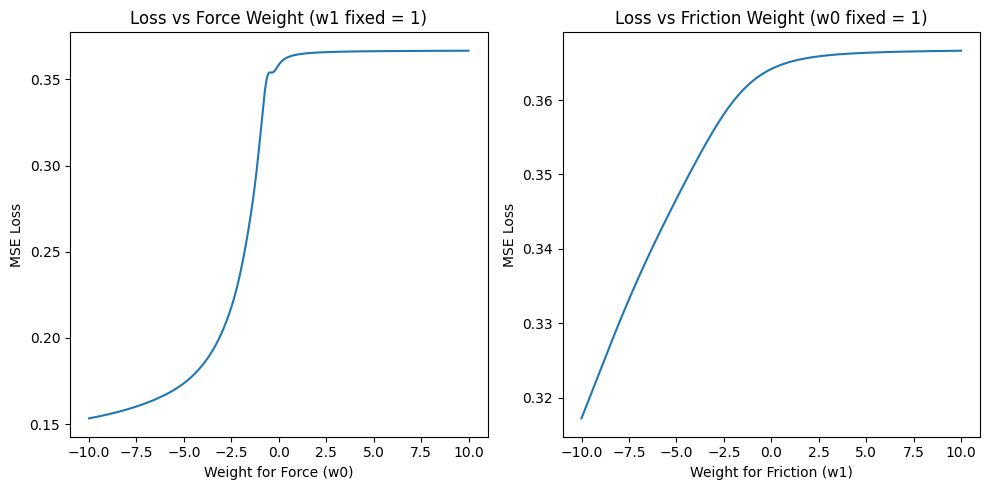

In [ ]:
#Vary weight0 and fix weight1. np.linspace is useful here
w0_vals = np.linspace(-10, 10, 1000)
w1_fixed = 5
bias = 2

losses_w0 = [MSE_cost(x_train, y_train, w0, w1_fixed, bias) for w0 in w0_vals]

# Vary weight1, keep weight0 fixed
w1_vals = np.linspace(-10, 10, 1000)
w0_fixed = 5
bias = 2
losses_w1 = [MSE_cost(x_train, y_train, w0_fixed, w1, bias) for w1 in w1_vals]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(w0_vals, losses_w0)
plt.xlabel("Weight for Force (w0)")
plt.ylabel("MSE Loss")
plt.title("Loss vs Force Weight (w1 fixed = 1)")

plt.subplot(1, 2, 2)
plt.plot(w1_vals, losses_w1)
plt.xlabel("Weight for Friction (w1)")
plt.ylabel("MSE Loss")
plt.title("Loss vs Friction Weight (w0 fixed = 1)")

plt.tight_layout()
plt.show()

### Binary cross-entropy loss


Binary cross-entropy loss, also known as log loss, is a commonly used cost function for binary classification problems. It measures the difference between the predicted probability and the actual binary label (0 or 1). The loss function penalizes incorrect predictions more heavily when the model is confident but wrong—for example, predicting a probability close to 1 when the true label is 0.









$$
L(y^{pred}, y^{actual}) = - \left[ y^{actual} \log(y^{pred}) + (1 -  y^{actual}) \log(1 - y^{pred}) \right]
$$

 This formulation ensures that the loss is small when the model predicts probabilities close to the correct class and large when it's far off, guiding the model to improve over time. Because it is based on likelihood principles, binary cross-entropy provides a reliable and mathematically grounded way to train models that output probabilities.


Implement the math above. Don't forget to include a normalization constant

In case error is 0, or sigmoid is 0 include a small clip so that log(0) doesn't occur.

p = np.clip(p, 1e-10, 1-1e-10) should be enough

In [ ]:
def cost(xdata, ydata, weight0, weight1, bias):
    """
    Compute the logistic regression cost (binary cross-entropy loss).

    Parameters
    ----------
    xdata : np.ndarray
        Input feature(s), shape (n_samples,) or (n_samples, n_features).
    ydata : np.ndarray
        Binary target labels (0 or 1), shape (n_samples,).
    weight0 : float
        Intercept (bias term).
    weight1 : float
        Slope (weight for xdata).

    Returns
    -------
    float
        Total cost (negative log-likelihood).
    """
    p = sigmoid(xdata, weight0, weight1, bias)

    # Clip probabilities to avoid log(0)
    p = np.clip(p, 1e-10, 1 - 1e-10)

    return -1/(ydata.size)*np.sum(ydata * np.log(p) + (1 - ydata) * np.log(1 - p))


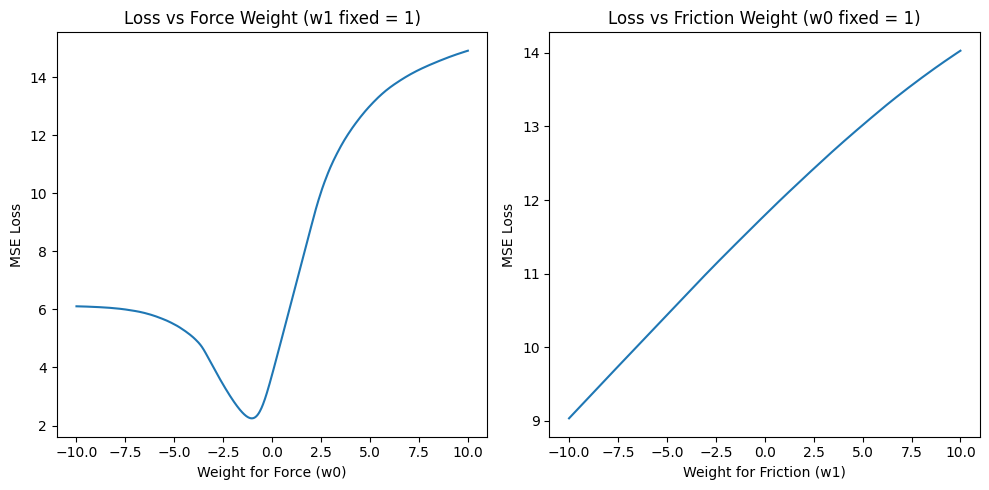

In [ ]:
#Vary weight0 and fix weight1. np.linspace is useful here

w0_vals = np.linspace(-10, 10, 1000)
w1_fixed = 5
bias = 2

losses_w0 = [cost(x_train, y_train, w0, w1_fixed, bias) for w0 in w0_vals]

# Vary weight1, keep weight0 fixed
w1_vals = np.linspace(-10, 10, 1000)
w0_fixed = 5
bias = 2
losses_w1 = [cost(x_train, y_train, w0_fixed, w1, bias) for w1 in w1_vals]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(w0_vals, losses_w0)
plt.xlabel("Weight for Force (w0)")
plt.ylabel("MSE Loss")
plt.title("Loss vs Force Weight (w1 fixed = 1)")

plt.subplot(1, 2, 2)
plt.plot(w1_vals, losses_w1)
plt.xlabel("Weight for Friction (w1)")
plt.ylabel("MSE Loss")
plt.title("Loss vs Friction Weight (w0 fixed = 1)")

plt.tight_layout()
plt.show()

### Gradient Descent

Implement gradient descent. Helper function are provided.

The gradient for the weights should be:

$$
\frac{\partial L}{\partial w_j} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \cdot x_{i,j}
$$

The gradient for the biases should be:

$$
\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
$$



In [ ]:
def derivative_weight(xdata, ydata, weight0, weight1, bias):
    """
    Compute the gradient of the mean squared error cost function
    with respect to the weights (weight0, weight1).

    Parameters:
        xdata (np.ndarray): A (n_samples, 2) array where each row is a sample with two features.
        ydata (np.ndarray): A (n_samples,) array of binary labels (0 or 1).
        weight0 (float): The weight for the first feature.
        weight1 (float): The weight for the second feature.
        bias (float): The bias term

    Returns:
        np.ndarray: A 1D array of shape (2,) containing the gradients [dL/dw0, dL/dw1].
    """
    n_samples = xdata.shape[0]

    # Compute prediction error
    predictions = sigmoid(xdata, weight0, weight1, bias)
    error = predictions - ydata  # shape: (n_samples,)


    # Compute gradient: dot product of error and each feature column
    grad_w0 = (1 / n_samples) * np.dot(error, xdata[:, 0])
    grad_w1 = (1 / n_samples) * np.dot(error, xdata[:, 1])

    return np.array([grad_w0, grad_w1])

In [ ]:
def derivative_bias(xdata, ydata, weight0, weight1, bias):
    """
    Compute gradient of cost w.r.t. bias.
    """
    error = sigmoid(xdata, weight0, weight1, bias) - ydata
    grad_bias = np.mean(error)  # mean of errors = gradient w.r.t. bias
    return grad_bias

In [ ]:
def gradient_descent(xdata, ydata, init_w0, init_w1, init_b, alpha=0.1, steps=10000):
    # Initialize best values
    w_0 = init_w0
    w_1 = init_w1
    b = init_b

    best_bias = 0
    best_weight0 = 0
    best_weight1 = 0
    min_cost = cost(x_train, y_train, w_0, w_1, b)

    # Initialize cost history list
    cost_history = [min_cost]

    # Gradient descent loop
    for epoch in range(steps):
        # Compute gradients
        grad_w = derivative_weight(xdata, ydata, w_0, w_1, b)
        grad_b = derivative_bias(x_train, y_train, w_0, w_1, b)

        # Update parameters
        w_0 -= alpha * grad_w[0]
        w_1 -= alpha * grad_w[1]
        b   -= alpha * grad_b

        # Compute current cost
        current_cost = cost(x_train, y_train, w_0, w_1, b)

        # Append to cost history
        cost_history.append(current_cost)

        # Update best parameters if current cost is lower
        if current_cost < min_cost:
            min_cost = current_cost
            best_bias = b
            best_weight0 = w_0
            best_weight1 = w_1

    # Return best parameters and full cost history
    return best_weight0, best_weight1, best_bias, cost_history

Now use the gradient descent function above and get the weights, bias and cost over time

In [ ]:
w_0 = -2.5
w_1 = 2
b = 2

best_weight0, best_weight1, best_bias, tc = gradient_descent(x_train, y_train, w_0, w_1, b)

Plot the Cost Curve

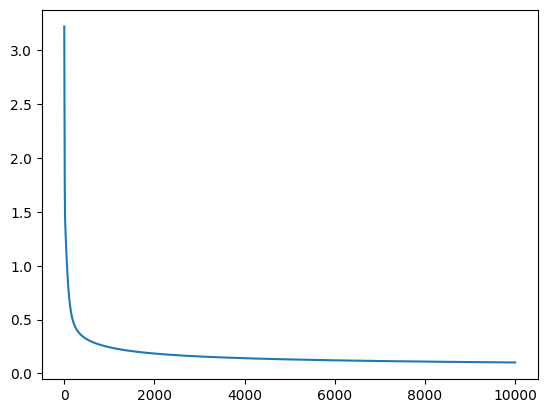

In [ ]:
tc = np.array(tc)
epochs = np.linspace(0, 10000, 10001)

plt.plot(epochs, tc)
plt.show()

**What should the slope of the decision boundary line be in terms of weights?** Hint: Look back at sigmoid function explanation

In [ ]:
#Write down the slope of the decision boundary.
m = -best_weight0/best_weight1

In [ ]:
best_weight0, best_weight1

(np.float64(1.1287287554246013), np.float64(-14.97834534563968))

What is the mass of the object?

In [ ]:
#Write the equation for the mass here in terms of the weights:

Check how well your decision boundary model works:

In [ ]:
#Use np.round since anything above 0.5 should be predicted as label 1, and anything below 0.5 should be predicted as label 0
#Use sigmoid function and use round function
predict = np.round(sigmoid(x_test, best_weight0, best_weight1, best_bias))

In order to determine how well your model did you must have a metric. For determining how well it did on training data, you use the total cost as your metric. For prediction on testing data usually its accuracy. We will see other metrics that you might want to be aware of later.

Accuracy is defined as $$\frac{\text{# of Correct Predictions}}{\text{All Predictions}}$$

In [ ]:
#What is the accuracy score?
differences = predict - y_test
correct_predictions = np.count_nonzero(differences == 0)
total_predictions = y_test.size

score = correct_predictions/total_predictions

print(score)

0.99


In [ ]:
def plotting(slope):
  xmin, xmax = 0, 8
  ymin, ymax = 0, 1

  xd = np.array([0, 8])
  yd = m*xd
  plt.plot(xd ,yd, 'k', lw = 2, ls = '--', color = 'r')
  plt.scatter(forces, friction_coeffs, c = labels)
  plt.xlabel("Force Applied (N)")
  plt.ylabel("Frictional Coefficient (Unitless)")
  plt.title("Scatter Plot of Movement of Objects Under Varied Magnitudes of Force Applied and Frictional Coefficients")
  move_patch = mpatches.Patch(color=plt.cm.viridis(1.0), label='Moves')
  stationary_patch = mpatches.Patch(color=plt.cm.viridis(0.0), label='Stationary')
  plt.legend(handles=[stationary_patch, move_patch])
  plt.show()
  print(1/m)

/tmp/ipython-input-2016357153.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xd ,yd, 'k', lw = 2, ls = '--', color = 'r')


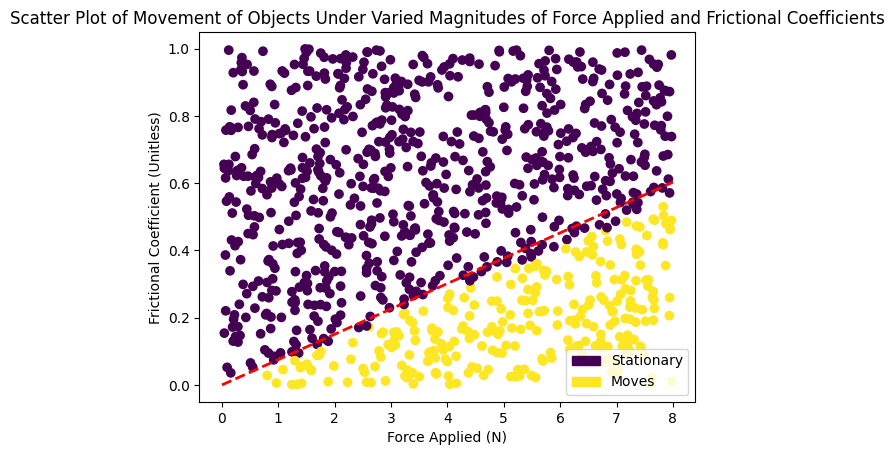

13.270101672925996


In [ ]:
plotting(m)

We will now look at the built in function method for Python. You just implemented logistic regression using math.

### Built-In Function Sklearn

Implementation for Sklearn built-in functions for LinearRegression Model. You will implement logistic regression

0.87


/tmp/ipython-input-2016357153.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xd ,yd, 'k', lw = 2, ls = '--', color = 'r')


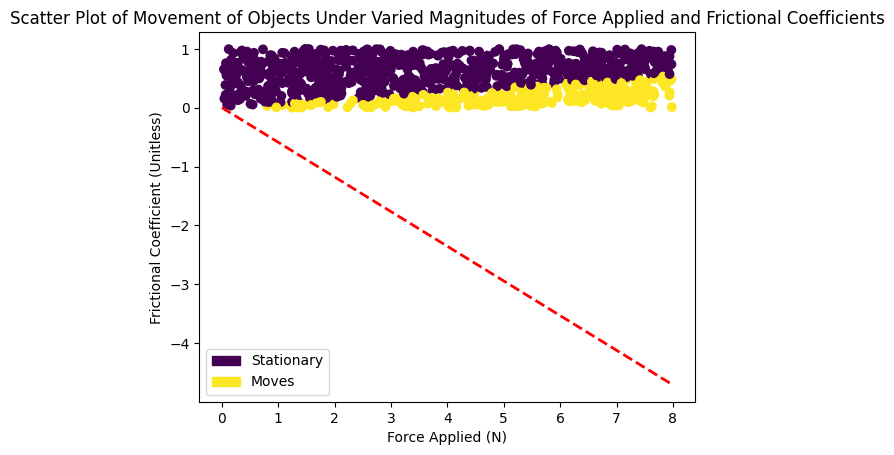

[ 8.16223568 -1.69815544]


In [ ]:
model = LinearRegression(fit_intercept = False)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

y_predict = np.round(y_predict)

#Accuracy_score automatically caluclates the accuracy score between your
#predicted value and the actual value.
print(accuracy_score(y_predict, y_test))

#LogisticRegression will be different here. You have to read about it in documentaiton
m = model.coef_

plotting(m)

### Step 1: Choose Model

    model = LinearRegression(fit_intercept = False)

Picks the model you are working with.

### Step 2: Fit the Model

    model.fit(x_train, y_train)

This code performs the mathematics described above of doing sigmoidal function and then performing gradient descent (GD) on the parameters

### Step 3: Evaluate Model

    y_predict = model.predict(x_test)
    print(accuracy_score(y_predict, y_test))

After performing GD, you then use the model to predict on your x_test data. Then you check the accuracy of the prediction.

### Step 4: Plotting Decision Boundary

    m = model.coef_

    plotting(m)

Implement LogisticRegression Below:

### Step 1: Choose Model

In [ ]:
model = LogisticRegression(fit_intercept=False)

### Step 2: Fit Model

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(fit_intercept=False)

### Step 3: Evaluate Model

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_predict))

0.99


### Step 4: Plot Decision Boundary

In [ ]:
#Hint check what model.coef_ returns.
w1, w2 = model.coef_[0]
b = model.intercept_[0]

In [ ]:
m = -w1/w2

/tmp/ipython-input-2016357153.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xd ,yd, 'k', lw = 2, ls = '--', color = 'r')


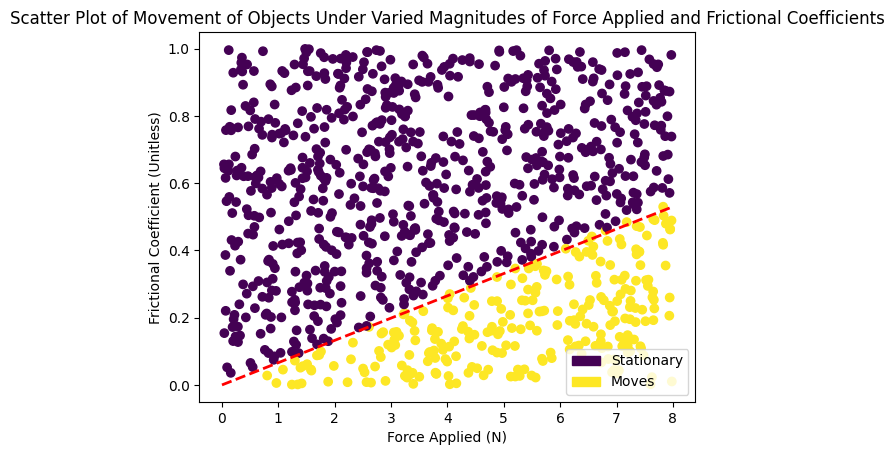

15.098509614445158


In [ ]:
#Use Plotting
plotting(m)

The actual gravitational force is:
14.7, so not bad

**What equation do you think we have to adjust in order to decrease the slope?**

Hint: Look at sigmoid function explanation

Logistic Regression works well with linear examples, but non-linear examples they fail if you use the same linear combination for z. Below is a simulation of a particle trapped in a potential well. It is a phase diagram with blue representing bounded particles, and red representing unbounded particles.

### Simulation Data

Imagine a particle is stuck in a potential well. For this lab just assume that you have

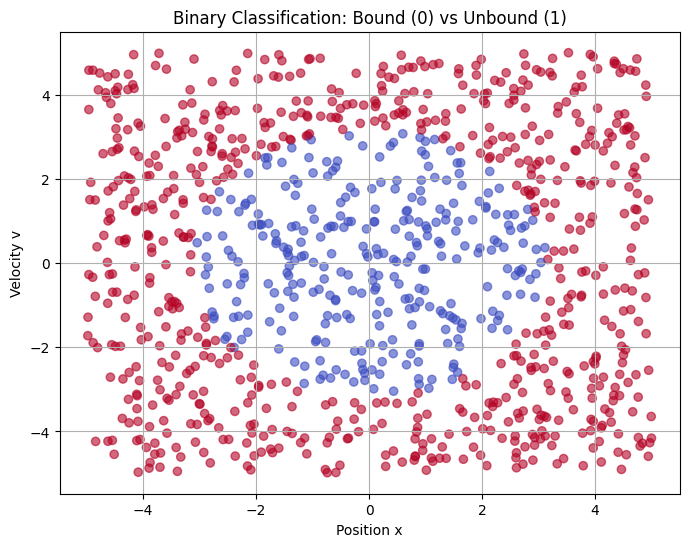

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
k = 1.0  # spring constant
E_thresh = 5.0  # energy threshold
n_samples = 1000
mass = 1.0

# Generate random (x, v) values
position = np.random.uniform(-5, 5, n_samples)
velocity = np.random.uniform(-5, 5, n_samples)

# Compute energies
potential_energy = 0.5 * k * position**2
kinetic_energy = 0.5 *mass* velocity**2
total_energy = kinetic_energy + potential_energy

# Generate labels: 0 if bounded (E <= E_threshold), 1 if unbounded (E > E_threshold)
labels = (total_energy > E_thresh).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'x': position,
    'v': velocity,
    'K': kinetic_energy,
    'P': potential_energy,
    'E': total_energy,
    'Label': labels
})

# Plotting the data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['x'], df['v'], c=df['Label'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Position x')
plt.ylabel('Velocity v')
plt.title('Binary Classification: Bound (0) vs Unbound (1)')
plt.grid(True)
plt.show()

**What equation do you think we have to adjust in order to get a elliptical shaped decision boundary?**

Hint: Look at sigmoid function explanation

Since LogisticRegression Formula

If you want you can personally try from scratch using math to implement the logistic regression formula to get elliptical shape.

But you earned the sklearn built in function, so use that instead.

### What should X data and Y data be?

In [ ]:
#Stack features together using np.stack for the x_data and set y_data as the y data
x_0 = df['x']**2
x_1 = df['v']**2

x_1 = x_1.to_numpy()
x_0 = x_0.to_numpy()

X = np.stack((x_0, x_1), axis=1)
y = df['Label'].to_numpy()

Hint: Your X_features should prolly not be linear combination. It should prolly be?

Hint: You should stack your features so X should be prolly be (, 2)

### Split the Dataset into Train and Test

In [ ]:
#Use train_test_split to split it into 20% test, 80% train.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Set the model

In [ ]:
model = LogisticRegression()

Fit the model

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

Predict the model output for x_test

In [ ]:
y_predict = model.predict(x_test)

Set weights

In [ ]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

In [ ]:
print(w1, w2, b)

2.93018800760826 2.844600564775287 -28.44030910105075


Determine the slope intercept

In [ ]:
m = -w1/w2
c = -b/w2

In [ ]:
print(m)

-1.0300876839767252


/tmp/ipython-input-44-1273173275.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(kinetic, line, 'k', lw = 2, ls = '--', color = 'r')


Text(0, 0.5, 'y')

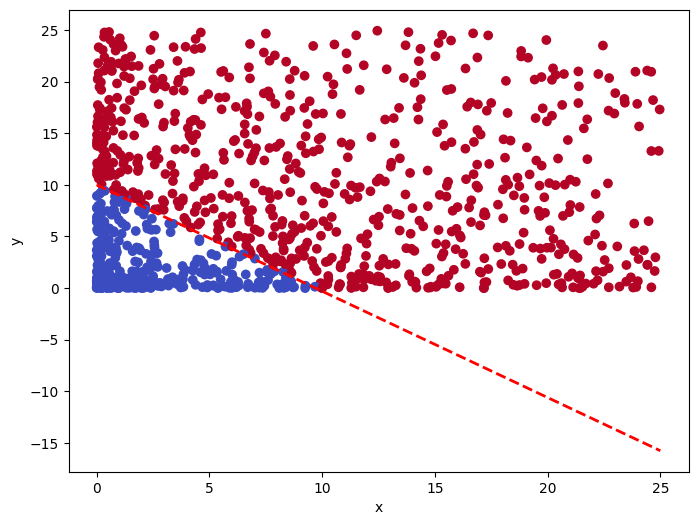

In [ ]:
x_vals = np.linspace(0, 5, 300)
v_vals = np.linspace(0, 5, 300)
kinetic= x_vals**2
potential = v_vals**2
line = m*kinetic+c

plt.figure(figsize=(8,6))
plt.scatter(x_0, x_1, c=df['Label'], cmap='coolwarm')
plt.plot(kinetic, line, 'k', lw = 2, ls = '--', color = 'r')
plt.xlabel('x')
plt.ylabel('y')


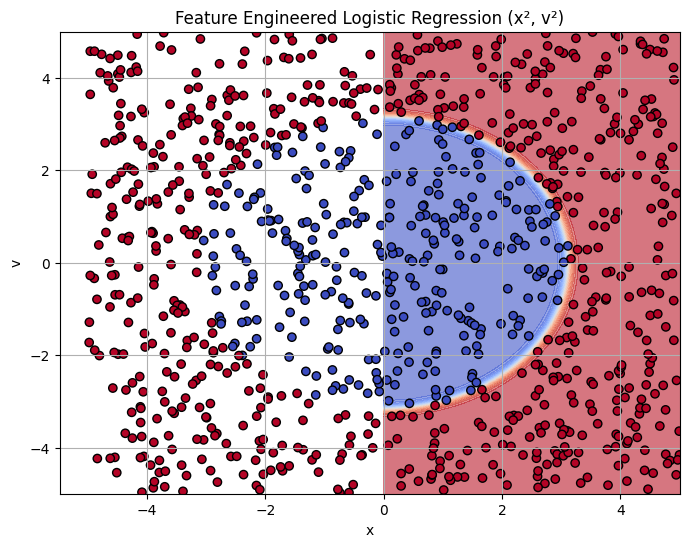

In [ ]:
# Make meshgrid for x and v
x_vals = np.linspace(-0, 5, 300)
v_vals = np.linspace(-5, 5, 300)
xx, vv = np.meshgrid(x_vals, v_vals)

# Compute features for meshgrid points
x_squared = xx**2
v_squared = vv**2
grid_features = np.c_[x_squared.ravel(), v_squared.ravel()]

# Predict probability on meshgrid
probs = model.predict_proba(grid_features)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, vv, probs, levels=25, cmap='coolwarm', alpha=0.6)
plt.scatter(df['x'], df['v'], c=df['Label'], cmap='coolwarm', edgecolor='k')
plt.xlabel("x")
plt.ylabel("v")
plt.title("Feature Engineered Logistic Regression (x², v²)")
plt.grid(True)
plt.show()

# List of Possible Bugs:

Dimension Mismatch: Gradient Descent and Derivative Bias might need to check the shape that is outputted and ensure that dimensions match up.

Log(0) Error: There might be a log(0) error depending on the input dimension shape and if np.clip was correctly used.